# Tasca base de dades NoSQL
**Descripció**
Comencem a familiaritzar-nos amb bases de dades NoSQL !!! Comencem amb uns quants exercicis bàsics

### Recursos
Recursos de l'aula i [https://docs.spring.io/spring-data/mongodb/docs/current/reference/html/#reference](https://docs.spring.io/spring-data/mongodb/docs/current/reference/html/#reference) .

## Nivell 1
### Exercici 1
Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

In [56]:
import pymongo
from configparser import ConfigParser

import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tenim un fitxer de configuració on hi ha les dades de connexió

```shell
[atlas]
host = <host>
db = <db>
user = <usuari>
passwd = <password>
```

i el _llegim_

In [2]:
cfg = ConfigParser()
cfg.read('../config/mongodb-atlas.cfg')

host = cfg.get('atlas','host')
db = cfg.get('atlas','db')
user = cfg.get('atlas','user')
passwd = cfg.get('atlas','passwd')

### Exercici 2
Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.

In [3]:
# connexió a Atlas (cloud) de Mongodb

client = pymongo.MongoClient(f"mongodb+srv://{user}:{passwd}@{host}/{db}?retryWrites=true&w=majority")
db = client.test


In [5]:
client.list_database_names()

['sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'admin',
 'local']

In [9]:
search = s_abnb.get_collection('restaurants').find({'borough':'Manhattan','cuisine':'Delicatessen', })

search.collection.estimated_document_count()

25359

In [10]:
search.collection.count_documents(filter={})

25359

### Creem una Base de Dades a partir de les dades recollides d'idealista

In [11]:
ideadb = client.idealista

In [19]:
with open('../scrapy/venta_viviendas.json') as file:
    file_data = json.load(file)
      

if isinstance(file_data, list):
    ideadb['vivendes-bcn'].insert_many(file_data)
else:
    print('???')

In [20]:
client.list_database_names()

['idealista',
 'sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'test',
 'admin',
 'local']

## Nivell 2
### Exercici 1
Carega algunes consultes senzilles a un Pandas Dataframe. 

In [6]:
s_abnb = client.get_database(name='sample_restaurants')

In [7]:
s_abnb.list_collection_names()

['neighborhoods', 'restaurants']

In [53]:
search = ideadb.get_collection('vivendes-bcn').find({'superficie': { "$gt": 400}})

for s in search:
    print(s)
    
#     birth: { $gt: new Date('1950-01-01')

{'_id': ObjectId('60f5b395536bc2cd558f97a3'), 'link': 'https://www.idealista.com/inmueble/94224032/', 'telf': '+34 932755285', 'precio': 2195000, 'nombre': 'Piso en Vila de Gràcia, Barcelona', 'habitaciones': 6, 'superficie': 427, 'otros': 'Planta 4ª exterior con ascensor', 'desc': 'Piso segregable en venta en Vila de Gràcia. En la zona más exquisita de Vila de Gràcia muy cerca de la Plaça de Narcís Oller, Gal·la Placi...'}
{'_id': ObjectId('60f5b395536bc2cd558f97ba'), 'link': 'https://www.idealista.com/inmueble/89909378/', 'telf': '+34 932754236', 'precio': 2425000, 'nombre': 'Casa o chalet independiente en Sant Gervasi - La Bonanova, Barcelona', 'habitaciones': 6, 'superficie': 585, 'desc': 'Esta casa unifamiliar con 585 m2 construidos se encuentra en un complejo residencial de lujo de una de las zonas más exclusivas de Barcel...'}
{'_id': ObjectId('60f5b395536bc2cd558f97ed'), 'link': 'https://www.idealista.com/inmueble/84736513/', 'telf': '+34 932931046', 'precio': 875000, 'nombre':

#### Ho fem amb la BBDD creada d'idealista

In [25]:
dfidea = pd.DataFrame(list(ideadb.get_collection('vivendes-bcn').find({})))

In [55]:
cols = ['nombre','precio', 'habitaciones','superficie', 'otros', 'desc']

mask = dfidea.superficie > 400
dfidea.loc[mask, cols]

,nombre,precio,habitaciones,superficie,otros,desc
77,"Piso en Vila de Gràcia, Barcelona",2195000,6.0,427,Planta 4ª exterior con ascensor,Piso segregable en venta en Vila de Gràcia. En...
100,Casa o chalet independiente en Sant Gervasi - ...,2425000,6.0,585,NaN,Esta casa unifamiliar con 585 m2 construidos s...
151,Casa o chalet independiente en Vallvidrera - E...,875000,5.0,455,NaN,Magnífica casa de 455 m2 de superficie constru...
153,"Casa o chalet independiente en Pedralbes, Barc...",3500000,8.0,620,NaN,Acogedora casa junto a Avenida Pearson. Magníf...
177,Casa o chalet independiente en Vallvidrera - E...,1975000,6.0,409,NaN,Exclusiva villa de lujo en sensacional parcela...
279,"Chalet en Pedralbes, Barcelona",5900000,6.0,712,NaN,EXCLUSIVA CASA CON VISTAS Y GRANDES POSIBILIDA...
318,"Ático en Sant Gervasi - La Bonanova, Barcelona",2800000,10.0,466,Planta 8ª exterior con ascensor,Singular ático-dúplex a reformar de unos 430m...
413,"Chalet en Sarrià, Barcelona",3000000,5.0,672,NaN,Esta villa completamente nueva mide 700 m² y c...
571,"Chalet en calle del Torrent de les Roses, Pedr...",3900000,5.0,600,NaN,"Fantástica casa de diseño de 600m2, en un terr..."
611,"Casa o chalet independiente en Sarrià, Barcelona",7450000,10.0,1800,NaN,Esta increíble casa en parcela de 2269 m2 se e...


## Nivell 3
### Exercici 1
Genera un resum estadístic de la informació que conté la base de dades.

In [28]:
dfidea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           900 non-null    object 
 1   link          900 non-null    object 
 2   telf          900 non-null    object 
 3   precio        900 non-null    int64  
 4   precio_ant    139 non-null    float64
 5   nombre        900 non-null    object 
 6   habitaciones  892 non-null    float64
 7   superficie    900 non-null    int64  
 8   otros         862 non-null    object 
 9   desc          900 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 70.4+ KB


In [30]:
dfidea.describe().round(2)

,precio,precio_ant,habitaciones,superficie
count,900.00,139.00,892.00,900.00
mean,738409.11,512592.12,3.26,134.86
std,690388.20,418420.74,1.29,105.14
min,99000.00,129000.00,1.00,28.00
25%,320000.00,257000.00,3.00,78.00
50%,550000.00,425000.00,3.00,109.00
75%,910000.00,647000.00,4.00,158.00
max,7450000.00,3500000.00,13.00,1800.00


##### Pisos sense habitacions?

In [32]:
cols = ['nombre','precio', 'habitaciones','superficie', 'otros', 'desc']
dfidea[dfidea.habitaciones.isna()][cols]

,nombre,precio,habitaciones,superficie,otros,desc
20,"Estudio en Vila de Gràcia, Barcelona",680000,NaN,202,Bajo exterior sin ascensor,Precioso loft cerca de Passeig de Gràcia. En u...
257,"Estudio en El Camp d'En Grassot i Gràcia Nova,...",159000,NaN,44,Bajo exterior sin ascensor,Estudio en Vila de Gràcia. Estudio con acceso ...
424,"Estudio en Sant Gervasi - Galvany, Barcelona",540000,NaN,102,exterior,En pleno Turó Park encontramos este magnífico ...
543,"Estudio en calle de Sugranyes, s/n, Sants - Ba...",119000,NaN,37,Bajo exterior sin ascensor,L̲A̲ C̲A̲S̲A̲ A̲G̲E̲N̲C̲Y̲ P̲R̲E̲S̲E̲N̲T̲A̲:. ...
579,"Ático en calle de Piquer, El Poble Sec - Parc ...",325000,NaN,28,Planta 5ª exterior con ascensor,Ático en venta CON LICENCIA TURÍSTICA en el Po...
597,"Estudio en calle de Ferlandina, El Raval, Barc...",125000,NaN,40,Planta 3ª exterior sin ascensor,Bonito apartamento recien reformado con acabad...
620,"Dúplex en plaza Guinardó, 10, El Guinardó, Bar...",395000,NaN,105,Bajo exterior con ascensor,Te imaginas unas viviendas diseñados para disf...
821,"Estudio en Les Tres Torres, Barcelona",275000,NaN,96,Planta 1ª exterior con ascensor,Loft reformado en Tres Torres. En el corazón d...


Text(0.5, 1.0, 'Rel preu/superficie amb num habitacions')

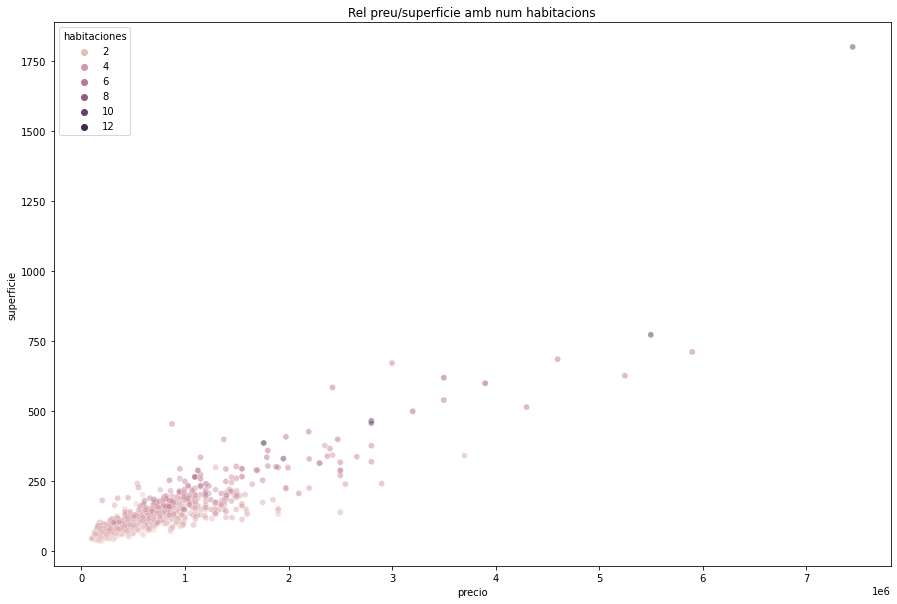

In [57]:
fig = plt.figure(figsize=(15,10))

g= sns.scatterplot(data=dfidea, x='precio', y='superficie', 
                   hue='habitaciones', alpha=0.5)
g.set_title('Rel preu/superficie amb num habitacions')